#                                               PROJECT PART 4 - TEAM 7
                                                
##                                 Members: Gauri Mhetre, Rohit Nagotkar, Dnyandeep Dhok                                                   


In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, MiniBatchKMeans, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.utils import resample


## Combining all the csv files

In [2]:
df_dir = "./raw_data/"
raw_csv = [f for f in os.listdir(df_dir) if f.endswith('.csv')]
print(f"list of all csv files {raw_csv}")
dfs = []

for csv in raw_csv:
    df = pd.read_csv(os.path.join(df_dir, csv))
    dfs.append(df)
main_df = pd.concat(dfs, ignore_index=True)
main_df.head()

list of all csv files ['dataset-of-90s.csv', 'dataset-of-80s.csv', 'dataset-of-00s.csv', 'dataset-of-60s.csv', 'dataset-of-10s.csv', 'dataset-of-70s.csv']


track           artist  \
0                                     Misty Roses  Astrud Gilberto   
1                                      Never Ever       All Saints   
2                                     Soul Sermon    Gregg Karukas   
3                       Clarinet Marmalade - Live    Alton Purnell   
4  До смерті і довше - Drum & Base and Rock Remix         Skryabin   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm         0.527   0.316    1   -15.769   
1  spotify:track:5FTz9qQ94PyUHETyAyfYZN         0.738   0.541    1    -5.485   
2  spotify:track:6m24oe3lk1UMxq9zq4iPFi         0.736   0.419    0   -10.662   
3  spotify:track:5FOXuiLI6knVtgMUjWKj6x         0.565   0.594    5   -13.086   
4  spotify:track:6CxyIPTqSPvAPXfrIZczs4         0.513   0.760    4   -10.077   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0310      0.693000           0.00699    0.1680    0.543   
1     1       0.0311      0.559000           0.00000    0.0492    0.309   
2     1       0.0300      0.693000           0.49500    0.0809    0.265   
3     1       0.0646      0.655000           0.92600    0.6750    0.763   
4     1       0.0355      0.000017           0.00339    0.1530    0.961   

     tempo  duration_ms  time_signature  chorus_hit  sections  target  
0  116.211       158840               4    53.89523         6       0  
1  134.187       387573               4    32.16853        16       1  
2   93.982       237267               4    42.05369         9       0  
3  114.219       375933               4    80.99693        10       0  
4  153.166       430653               4    25.57331        20       0

# Data understanding

In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

## Description of numerical values

In [4]:
main_df.describe()

danceability        energy           key      loudness          mode  \
count  41106.000000  41106.000000  41106.000000  41106.000000  41106.000000   
mean       0.539695      0.579545      5.213594    -10.221525      0.693354   
std        0.177821      0.252628      3.534977      5.311626      0.461107   
min        0.000000      0.000251      0.000000    -49.253000      0.000000   
25%        0.420000      0.396000      2.000000    -12.816000      0.000000   
50%        0.552000      0.601000      5.000000     -9.257000      1.000000   
75%        0.669000      0.787000      8.000000     -6.374250      1.000000   
max        0.988000      1.000000     11.000000      3.744000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  41106.000000  41106.000000      41106.000000  41106.000000   
mean       0.072960      0.364197          0.154416      0.201535   
std        0.086112      0.338913          0.303530      0.172959   
min        0.000000      0.000000          0.000000      0.013000   
25%        0.033700      0.039400          0.000000      0.094000   
50%        0.043400      0.258000          0.000120      0.132000   
75%        0.069800      0.676000          0.061250      0.261000   
max        0.960000      0.996000          1.000000      0.999000   

            valence         tempo   duration_ms  time_signature    chorus_hit  \
count  41106.000000  41106.000000  4.110600e+04    41106.000000  41106.000000   
mean       0.542440    119.338249  2.348776e+05        3.893689     40.106041   
std        0.267329     29.098845  1.189674e+05        0.423073     19.005515   
min        0.000000      0.000000  1.516800e+04        0.000000      0.000000   
25%        0.330000     97.397000  1.729278e+05        4.000000     27.599792   
50%        0.558000    117.565000  2.179070e+05        4.000000     35.850795   
75%        0.768000    136.494000  2.667730e+05        4.000000     47.625615   
max        0.996000    241.423000  4.170227e+06        5.000000    433.182000   

           sections        target  
count  41106.000000  41106.000000  
mean      10.475673      0.500000  
std        4.871850      0.500006  
min        0.000000      0.000000  
25%        8.000000      0.000000  
50%       10.000000      0.500000  
75%       12.000000      1.000000  
max      169.000000      1.000000

## Mean, Median, Mode of all columns

In [5]:
for col in main_df.columns:
    if main_df[col].dtype!="object":
        print(f"The mean value for {col} is {main_df[col].mean()}")
        print(f"The median value for {col} is {main_df[col].median()}")
        print(f"The mode value for {col} is {main_df[col].mode()[0]}")
        print("-----------------------------------------------------------")
        

The mean value for danceability is 0.5396949642387974
The median value for danceability is 0.552
The mode value for danceability is 0.62
-----------------------------------------------------------
The mean value for energy is 0.5795448943219967
The median value for energy is 0.601
The mode value for energy is 0.641
-----------------------------------------------------------
The mean value for key is 5.213594122512529
The median value for key is 5.0
The mode value for key is 0
-----------------------------------------------------------
The mean value for loudness is -10.221525276115408
The median value for loudness is -9.257
The mode value for loudness is -8.142
-----------------------------------------------------------
The mean value for mode is 0.69335376830633
The median value for mode is 1.0
The mode value for mode is 1
-----------------------------------------------------------
The mean value for speechiness is 0.07296045832725151
The median value for speechiness is 0.0434
The mod

## Count of null values

In [6]:
main_df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [7]:
for col in main_df.columns:
    if main_df[col].dtype!="object":
        print(f"Range of {col} is {main_df[col].max() - main_df[col].min()}")
        print(f"Max & Min of {col} is {main_df[col].max()}, {main_df[col].min()}")
        print("--------------------")

Range of danceability is 0.988
Max & Min of danceability is 0.988, 0.0
--------------------
Range of energy is 0.999749
Max & Min of energy is 1.0, 0.000251
--------------------
Range of key is 11
Max & Min of key is 11, 0
--------------------
Range of loudness is 52.997
Max & Min of loudness is 3.744, -49.253
--------------------
Range of mode is 1
Max & Min of mode is 1, 0
--------------------
Range of speechiness is 0.96
Max & Min of speechiness is 0.96, 0.0
--------------------
Range of acousticness is 0.996
Max & Min of acousticness is 0.996, 0.0
--------------------
Range of instrumentalness is 1.0
Max & Min of instrumentalness is 1.0, 0.0
--------------------
Range of liveness is 0.986
Max & Min of liveness is 0.999, 0.013
--------------------
Range of valence is 0.996
Max & Min of valence is 0.996, 0.0
--------------------
Range of tempo is 241.423
Max & Min of tempo is 241.423, 0.0
--------------------
Range of duration_ms is 4155059
Max & Min of duration_ms is 4170227, 15168


In [8]:
main_df["key"].value_counts()

0     5130
7     4962
2     4619
9     4469
5     3790
4     3323
1     3278
11    2815
10    2728
8     2345
6     2217
3     1430
Name: key, dtype: int64

In [9]:
main_df.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

# Exploratory Data Analysis

## Histogram to see distribution of data


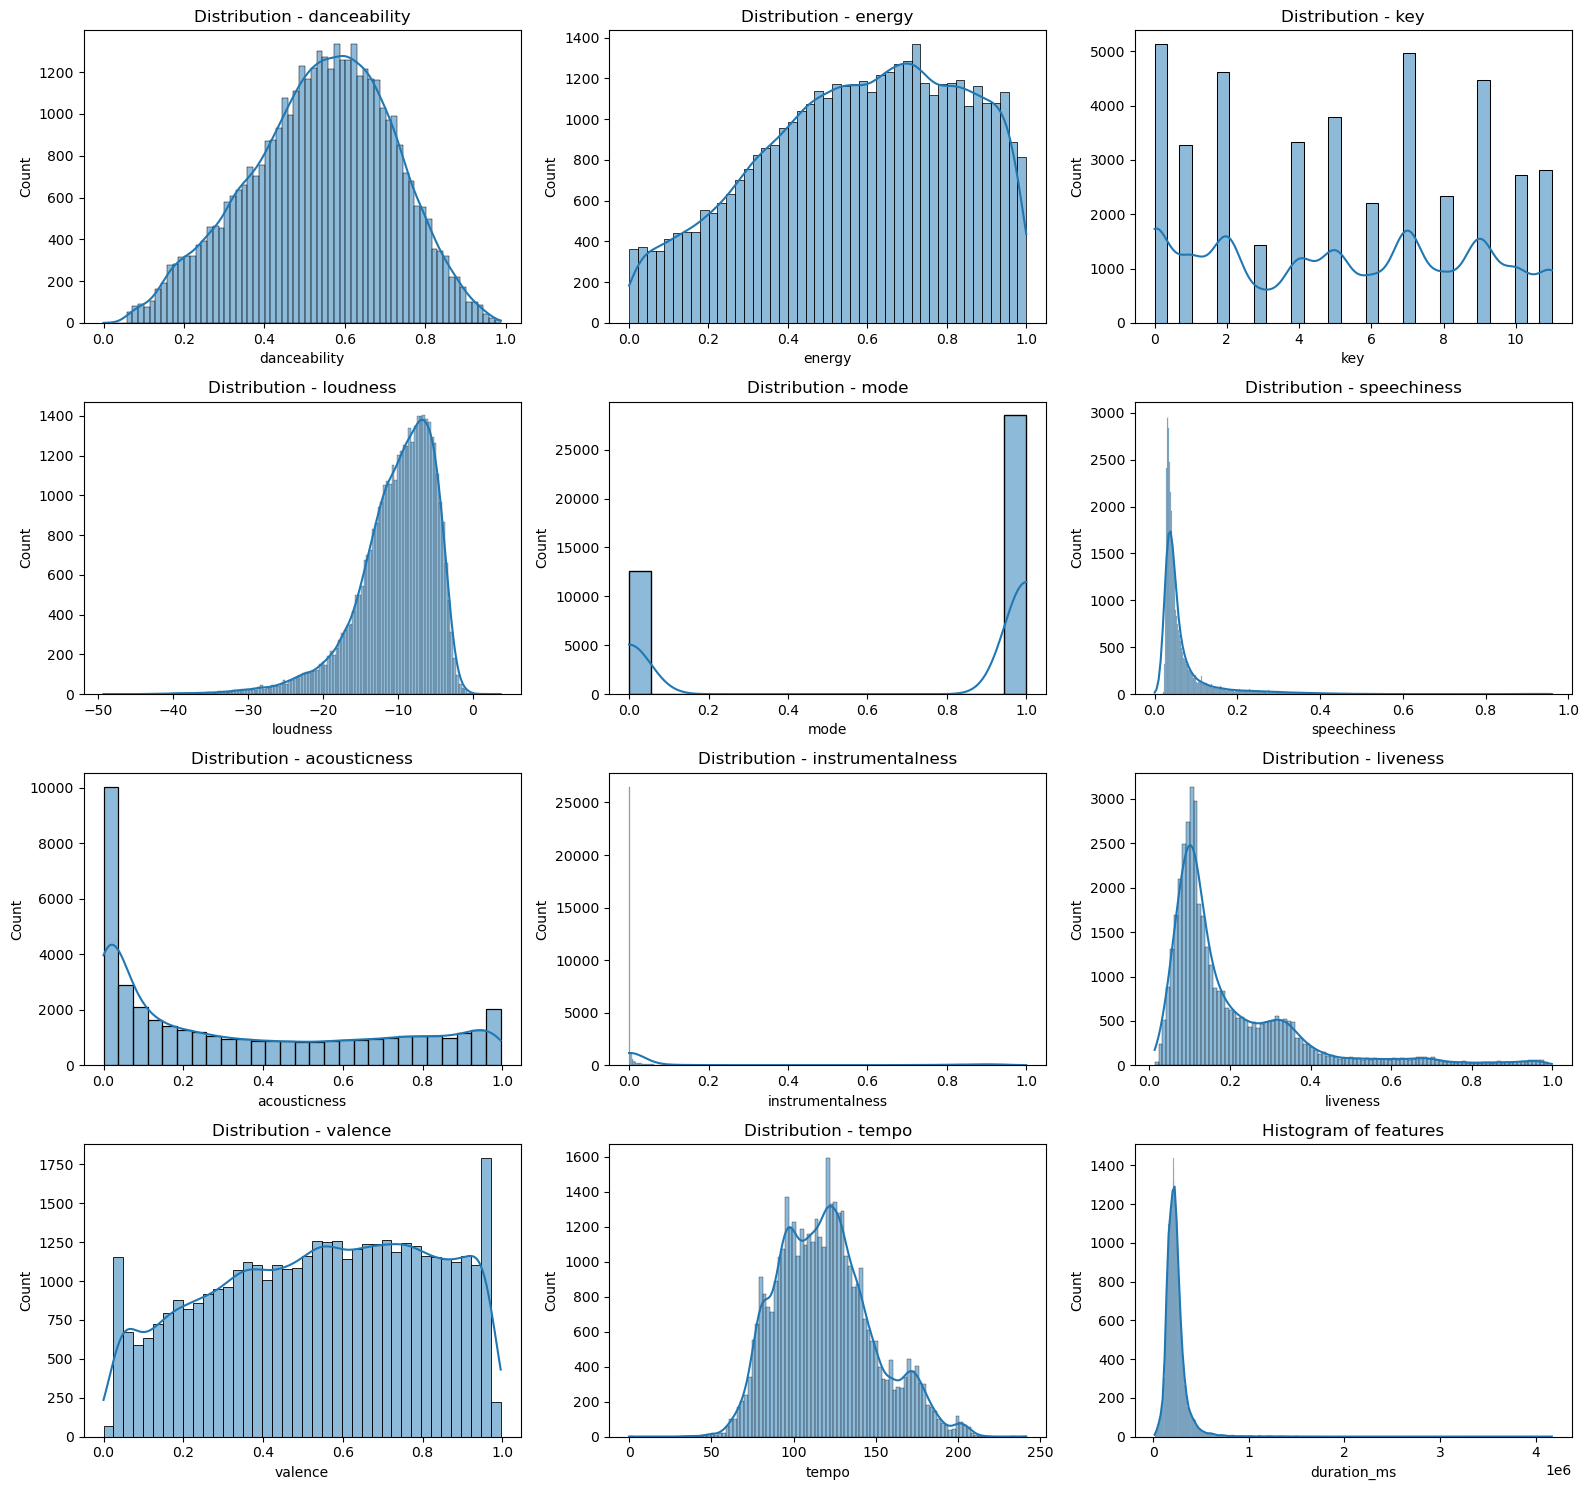

In [10]:
eda_columns = [['danceability', 'energy', 'key'],['loudness',
       'mode', 'speechiness'], ['acousticness', 'instrumentalness', 'liveness'],
       ['valence', 'tempo', 'duration_ms']]
fig, axs = plt.subplots(4, 3, figsize=(16, 15))

for row in range(4):
    for col in range(3):
        sns.histplot(main_df[eda_columns[row][col]], kde=True, ax=axs[row, col])
        axs[row, col].set_title(f"Distribution - {eda_columns[row][col]}")
plt.title("Histogram of features")
plt.tight_layout()
plt.show()

Danceability: The distribution appears to be slightly skewed to the right, with most tracks having a danceability value between 0.4 and 0.8 also there are a few tracks with very high danceability values (>0.9).

Energy: The distribution is roughly normal, with most tracks having an energy value between 0.4 and 0.8 also there are a few tracks with very high and very low energy values.

Key: The distribution appears to be fairly uniform, suggesting no particular key is dominant in the dataset. However, there are some spikes at certain key values, indicating a slight preference for those keys.

Loudness: The distribution is skewed to the right, with most tracks having a loudness value between -20 and -5 dB. There are a few tracks that are significantly louder than the majority.

Speechiness: The distribution is skewed to the left, with most tracks having a speechiness value close to 0.0. There are a few tracks with significant speech content (>0.4).

Acousticness: The distribution is roughly normal, with most tracks having an acousticness value between 0.4 and 0.8. There are a few tracks at both ends of the spectrum, with some being very electronic and others being very acoustic.

Instrumentalness: The distribution is skewed to the right, with most tracks having some level of vocals (instrumentalness < 0.8). There are a few tracks that are completely instrumental.

Liveness: The distribution is skewed to the left, with most tracks having a liveness value between 0.1 and 0.4. There are a few tracks at both ends of the spectrum, with some sounding very much like studio recordings and others sounding more like live performances.

Valence: The distribution is normal, with most tracks having a positive valence value (>0.5).

Tempo: The distribution is normal, with most tracks having a tempo value of 80 to 130.

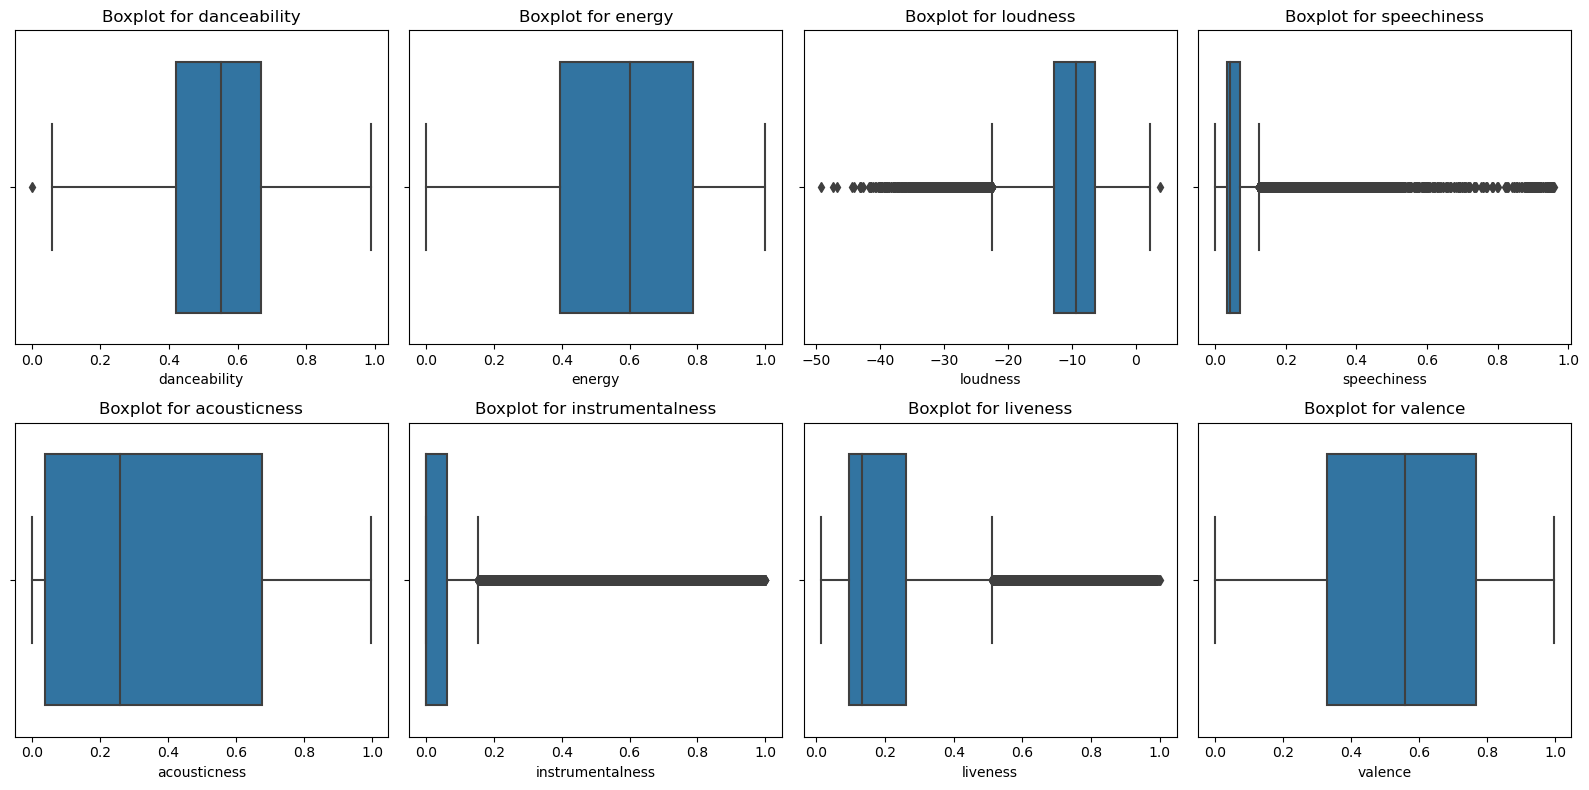

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

attributes = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

for i, col in enumerate(attributes):
    sns.boxplot(x=main_df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}")


plt.tight_layout()
plt.show()

Danceability, energy, and valence: Tend to be higher than average, suggesting a preference for music that is danceable, energetic, and positive.

Loudness: Generally quieter than industry standards, although there's a peak around -8.14 dB. Also, a lot of outliers in these column.

Acousticness: Mix of acoustic and electronic music, with a slight lean towards electronic but also a significant presence of fully acoustic tracks.

Speechiness and instrumentalness: Very low values, indicating mostly instrumental tracks with minimal spoken word content. Also there are a lot of outliers in these columns.

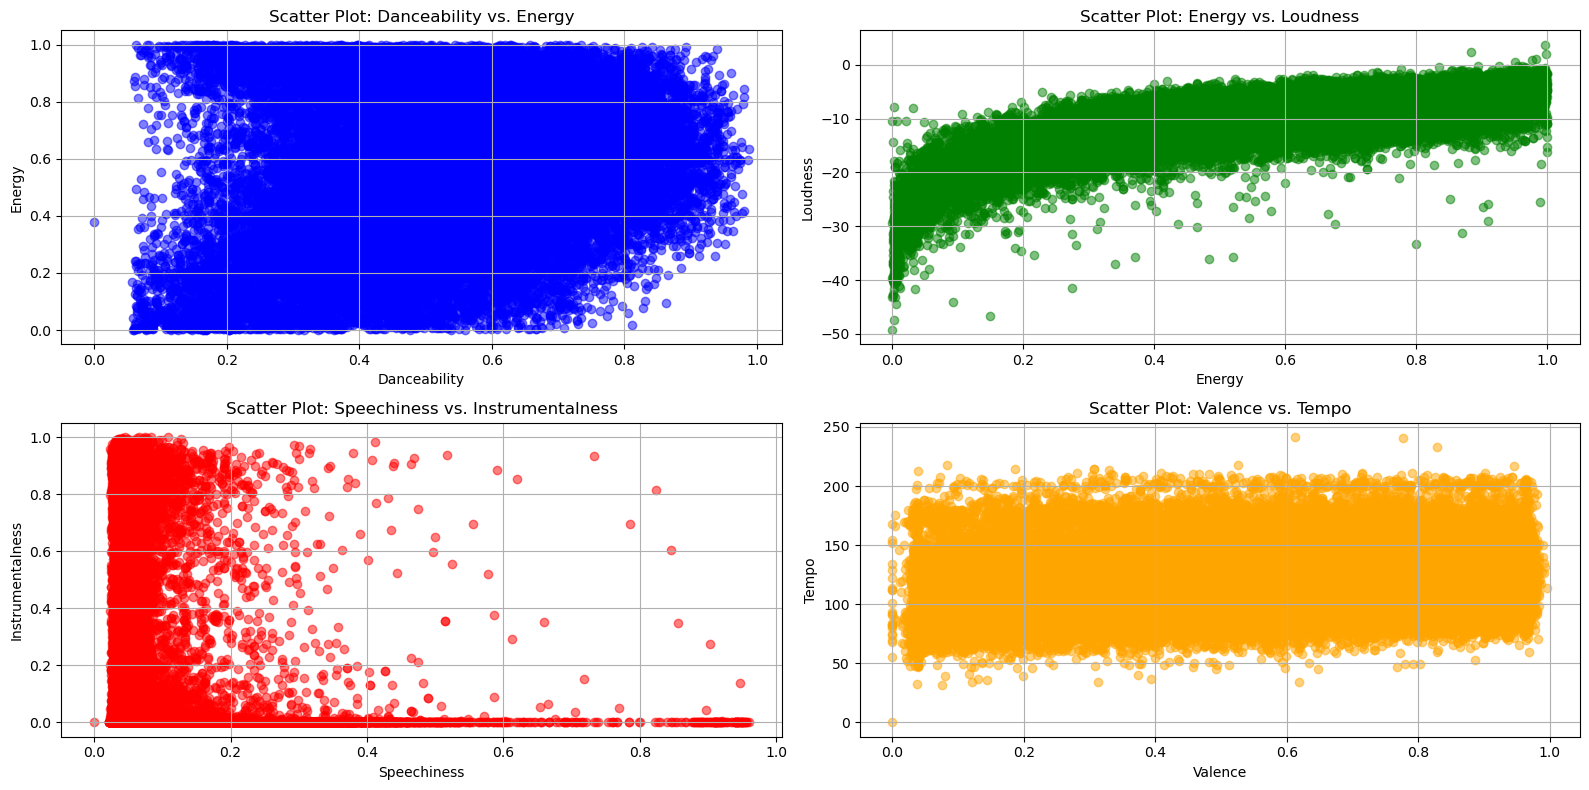

In [12]:
scatter_pairs = [('danceability', 'energy', 'blue'),
                 ('energy', 'loudness', 'green'),
                 ('speechiness', 'instrumentalness', 'red'),
                 ('valence', 'tempo', 'orange')]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
axes = axes.flatten()

for i, pair in enumerate(scatter_pairs):
    x_attr, y_attr, color = pair
    
    axes[i].scatter(main_df[x_attr], main_df[y_attr], color=color, alpha=0.5)
    axes[i].set_title(f'Scatter Plot: {x_attr.capitalize()} vs. {y_attr.capitalize()}')
    axes[i].set_xlabel(x_attr.capitalize())
    axes[i].set_ylabel(y_attr.capitalize())
    axes[i].grid(True)

plt.tight_layout()
plt.show()

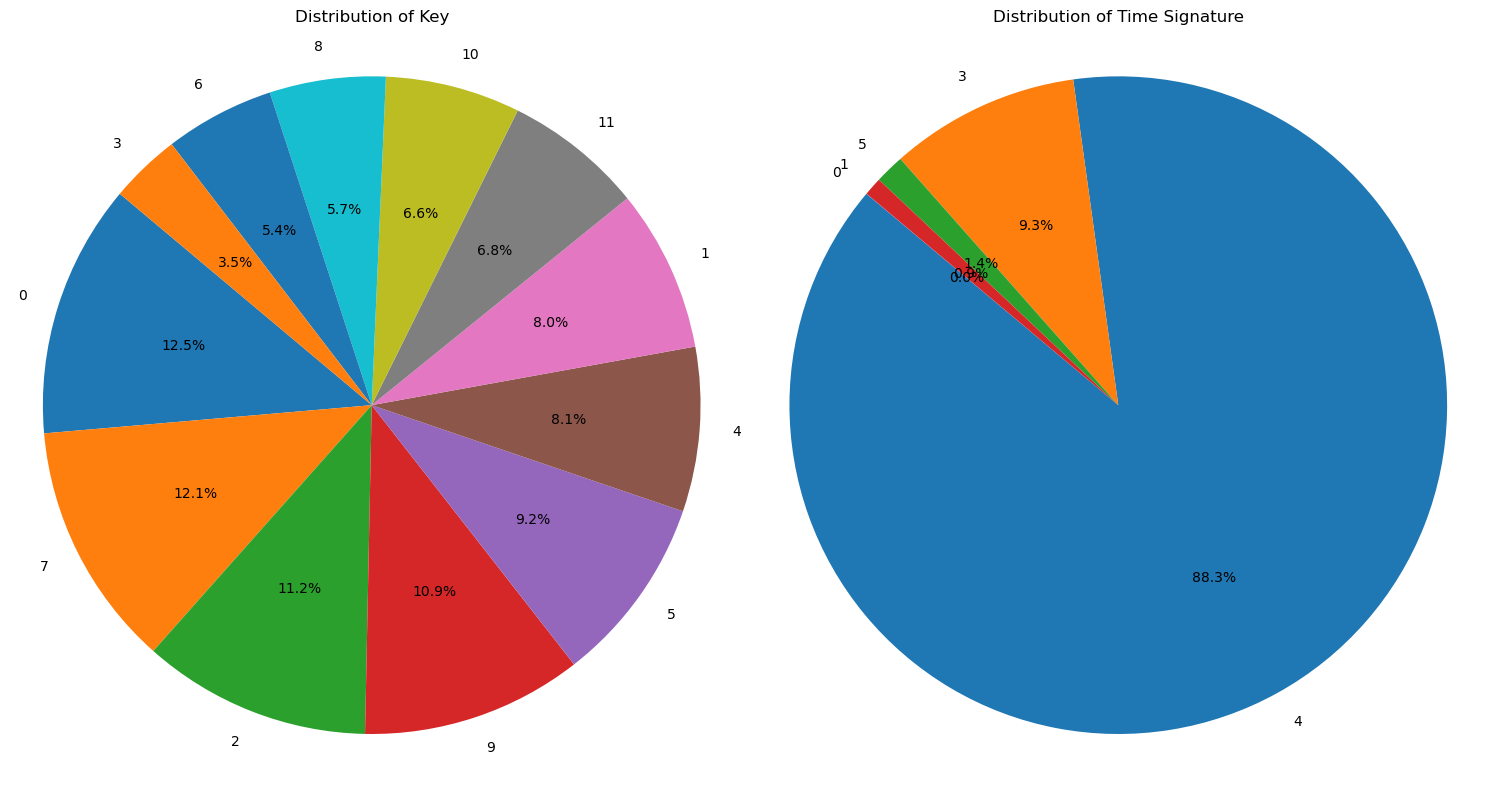

In [13]:
key_counts = main_df['key'].value_counts()
time_signature_counts = main_df['time_signature'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

axes[0].pie(key_counts, labels=key_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution of Key')
axes[0].axis('equal')  

axes[1].pie(time_signature_counts, labels=time_signature_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Distribution of Time Signature')
axes[1].axis('equal')  

fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()


We can see an overall even distribution of all the key pitches in the first chart and on the second chart 90.5% tracks has 4 beats per second which is also known as the common time.

## Pair plot for song variables

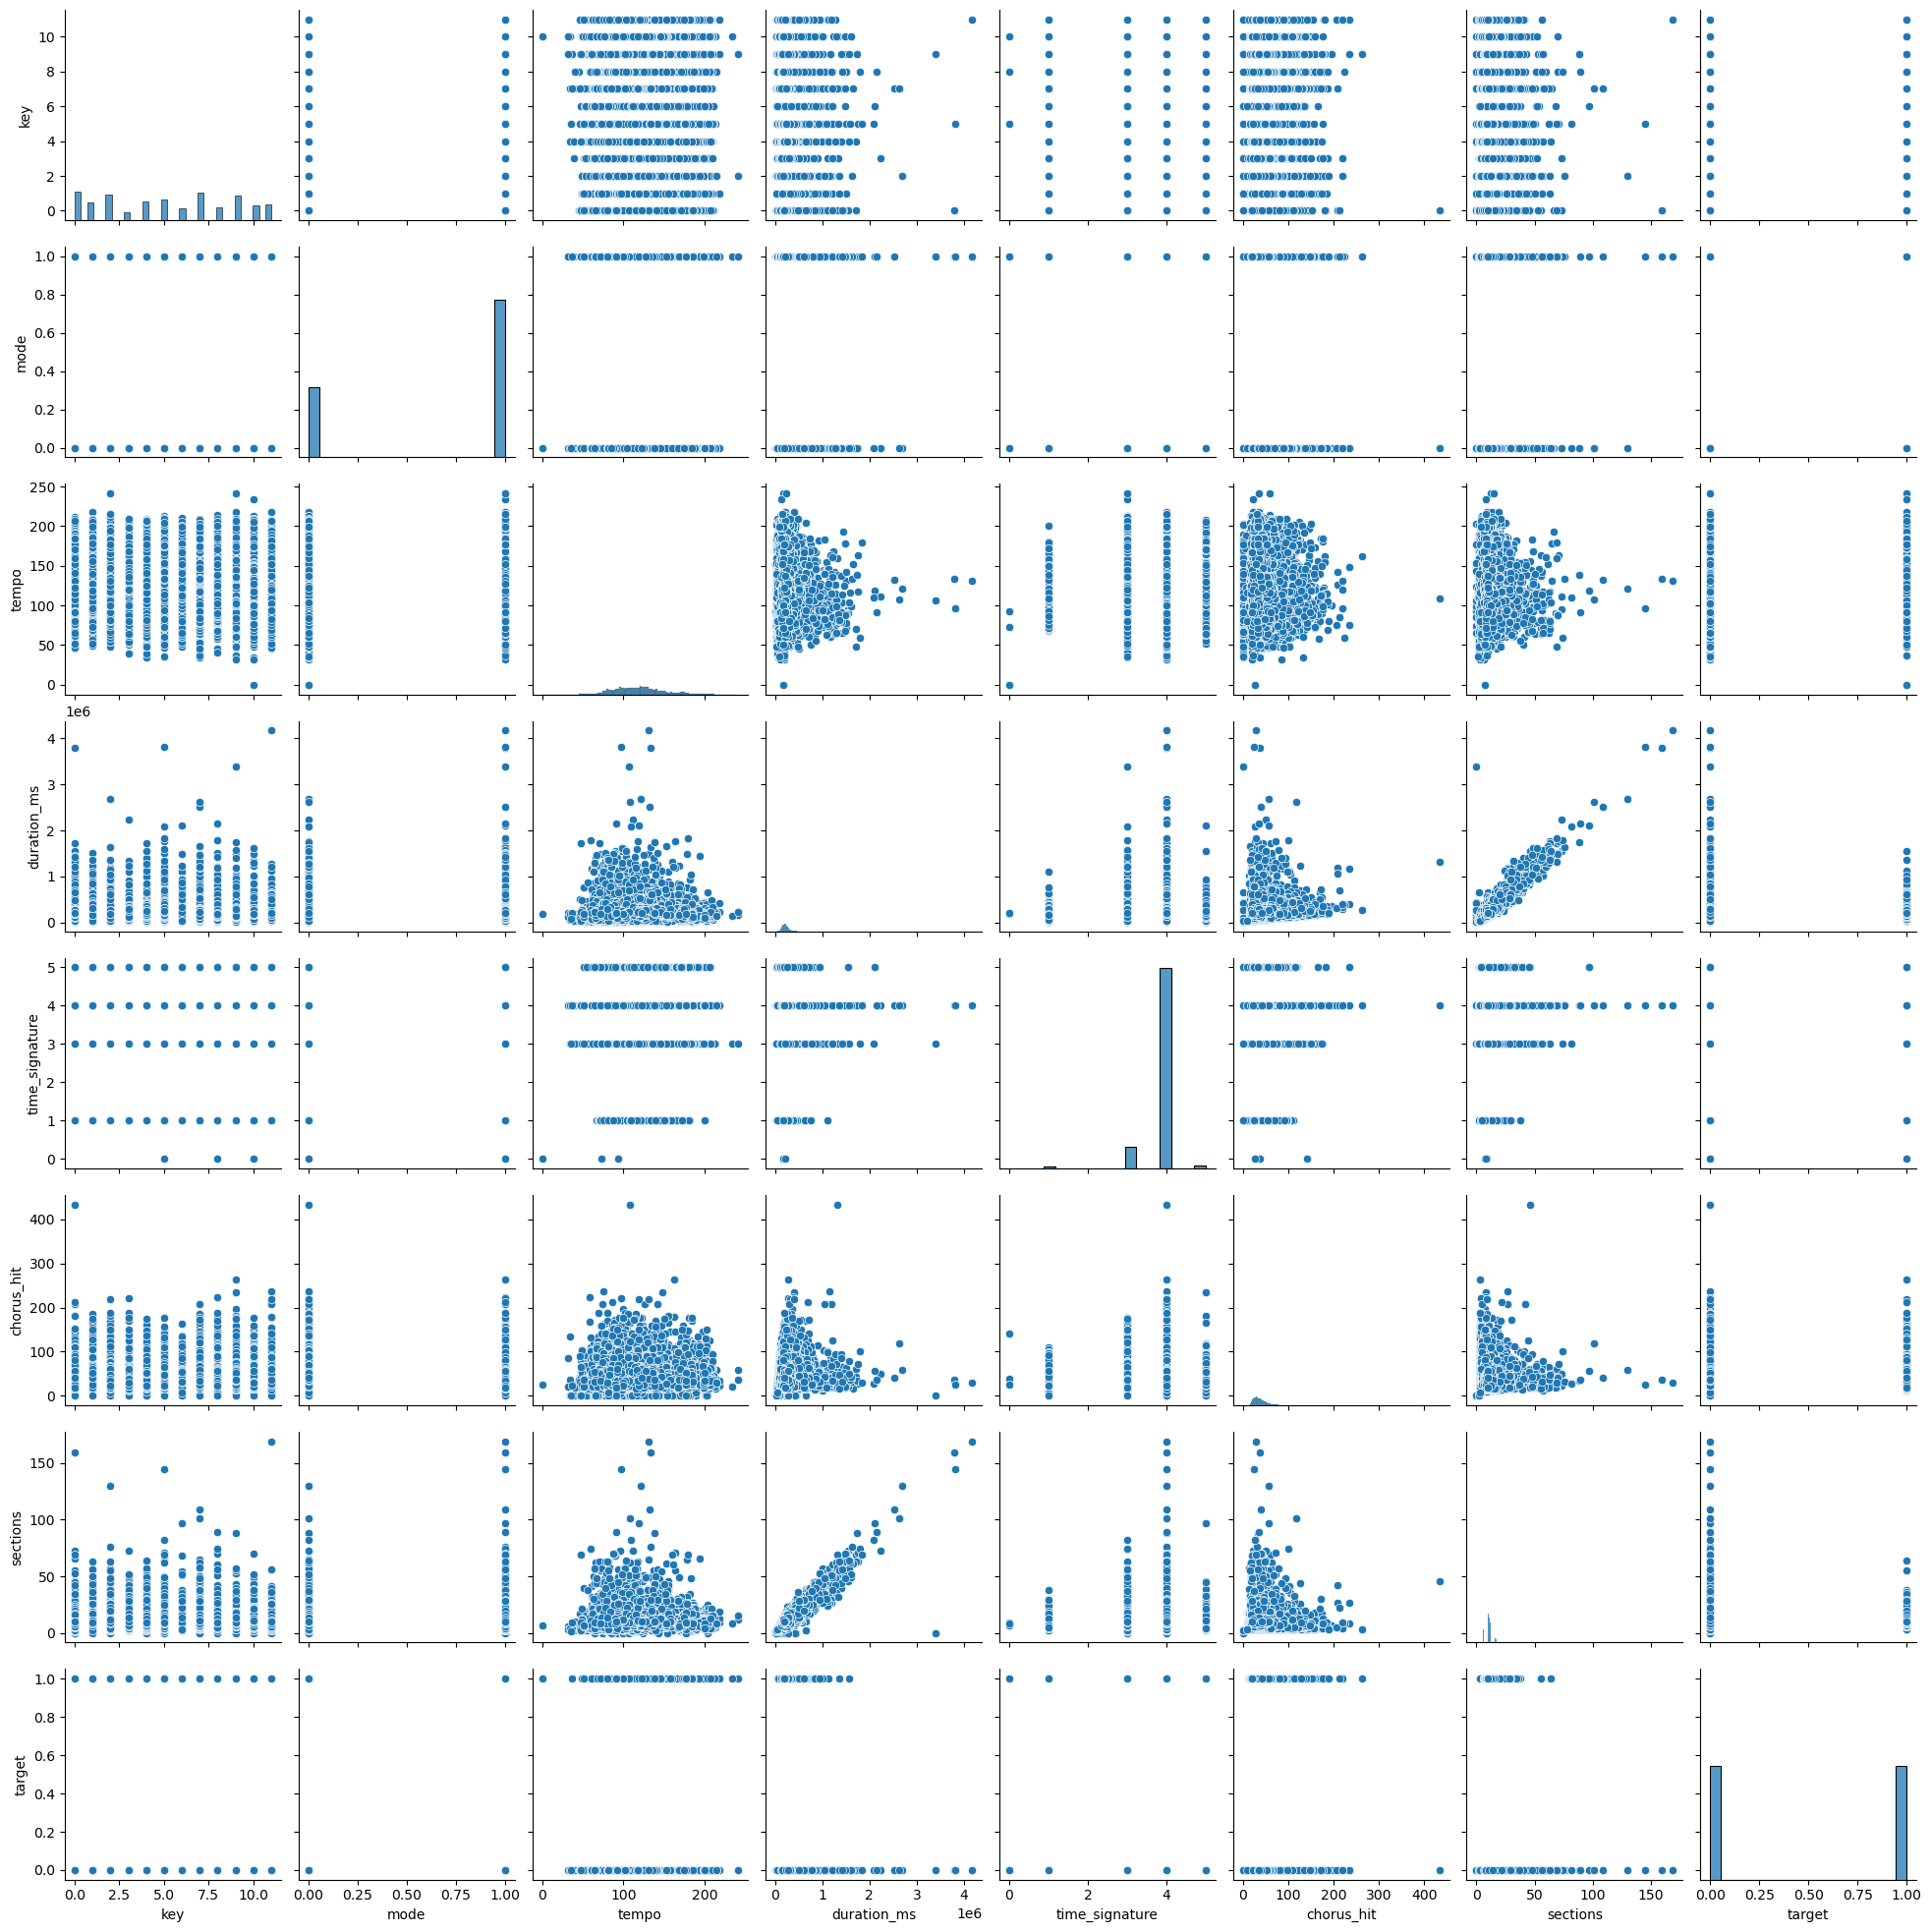

In [14]:
sns.pairplot(main_df[['track', 'artist', 'uri', 'key', 
       'mode','tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target']])
plt.show()

We can observe a good positive relation between sections and duration_ms

## Pair plot for the meta variables 

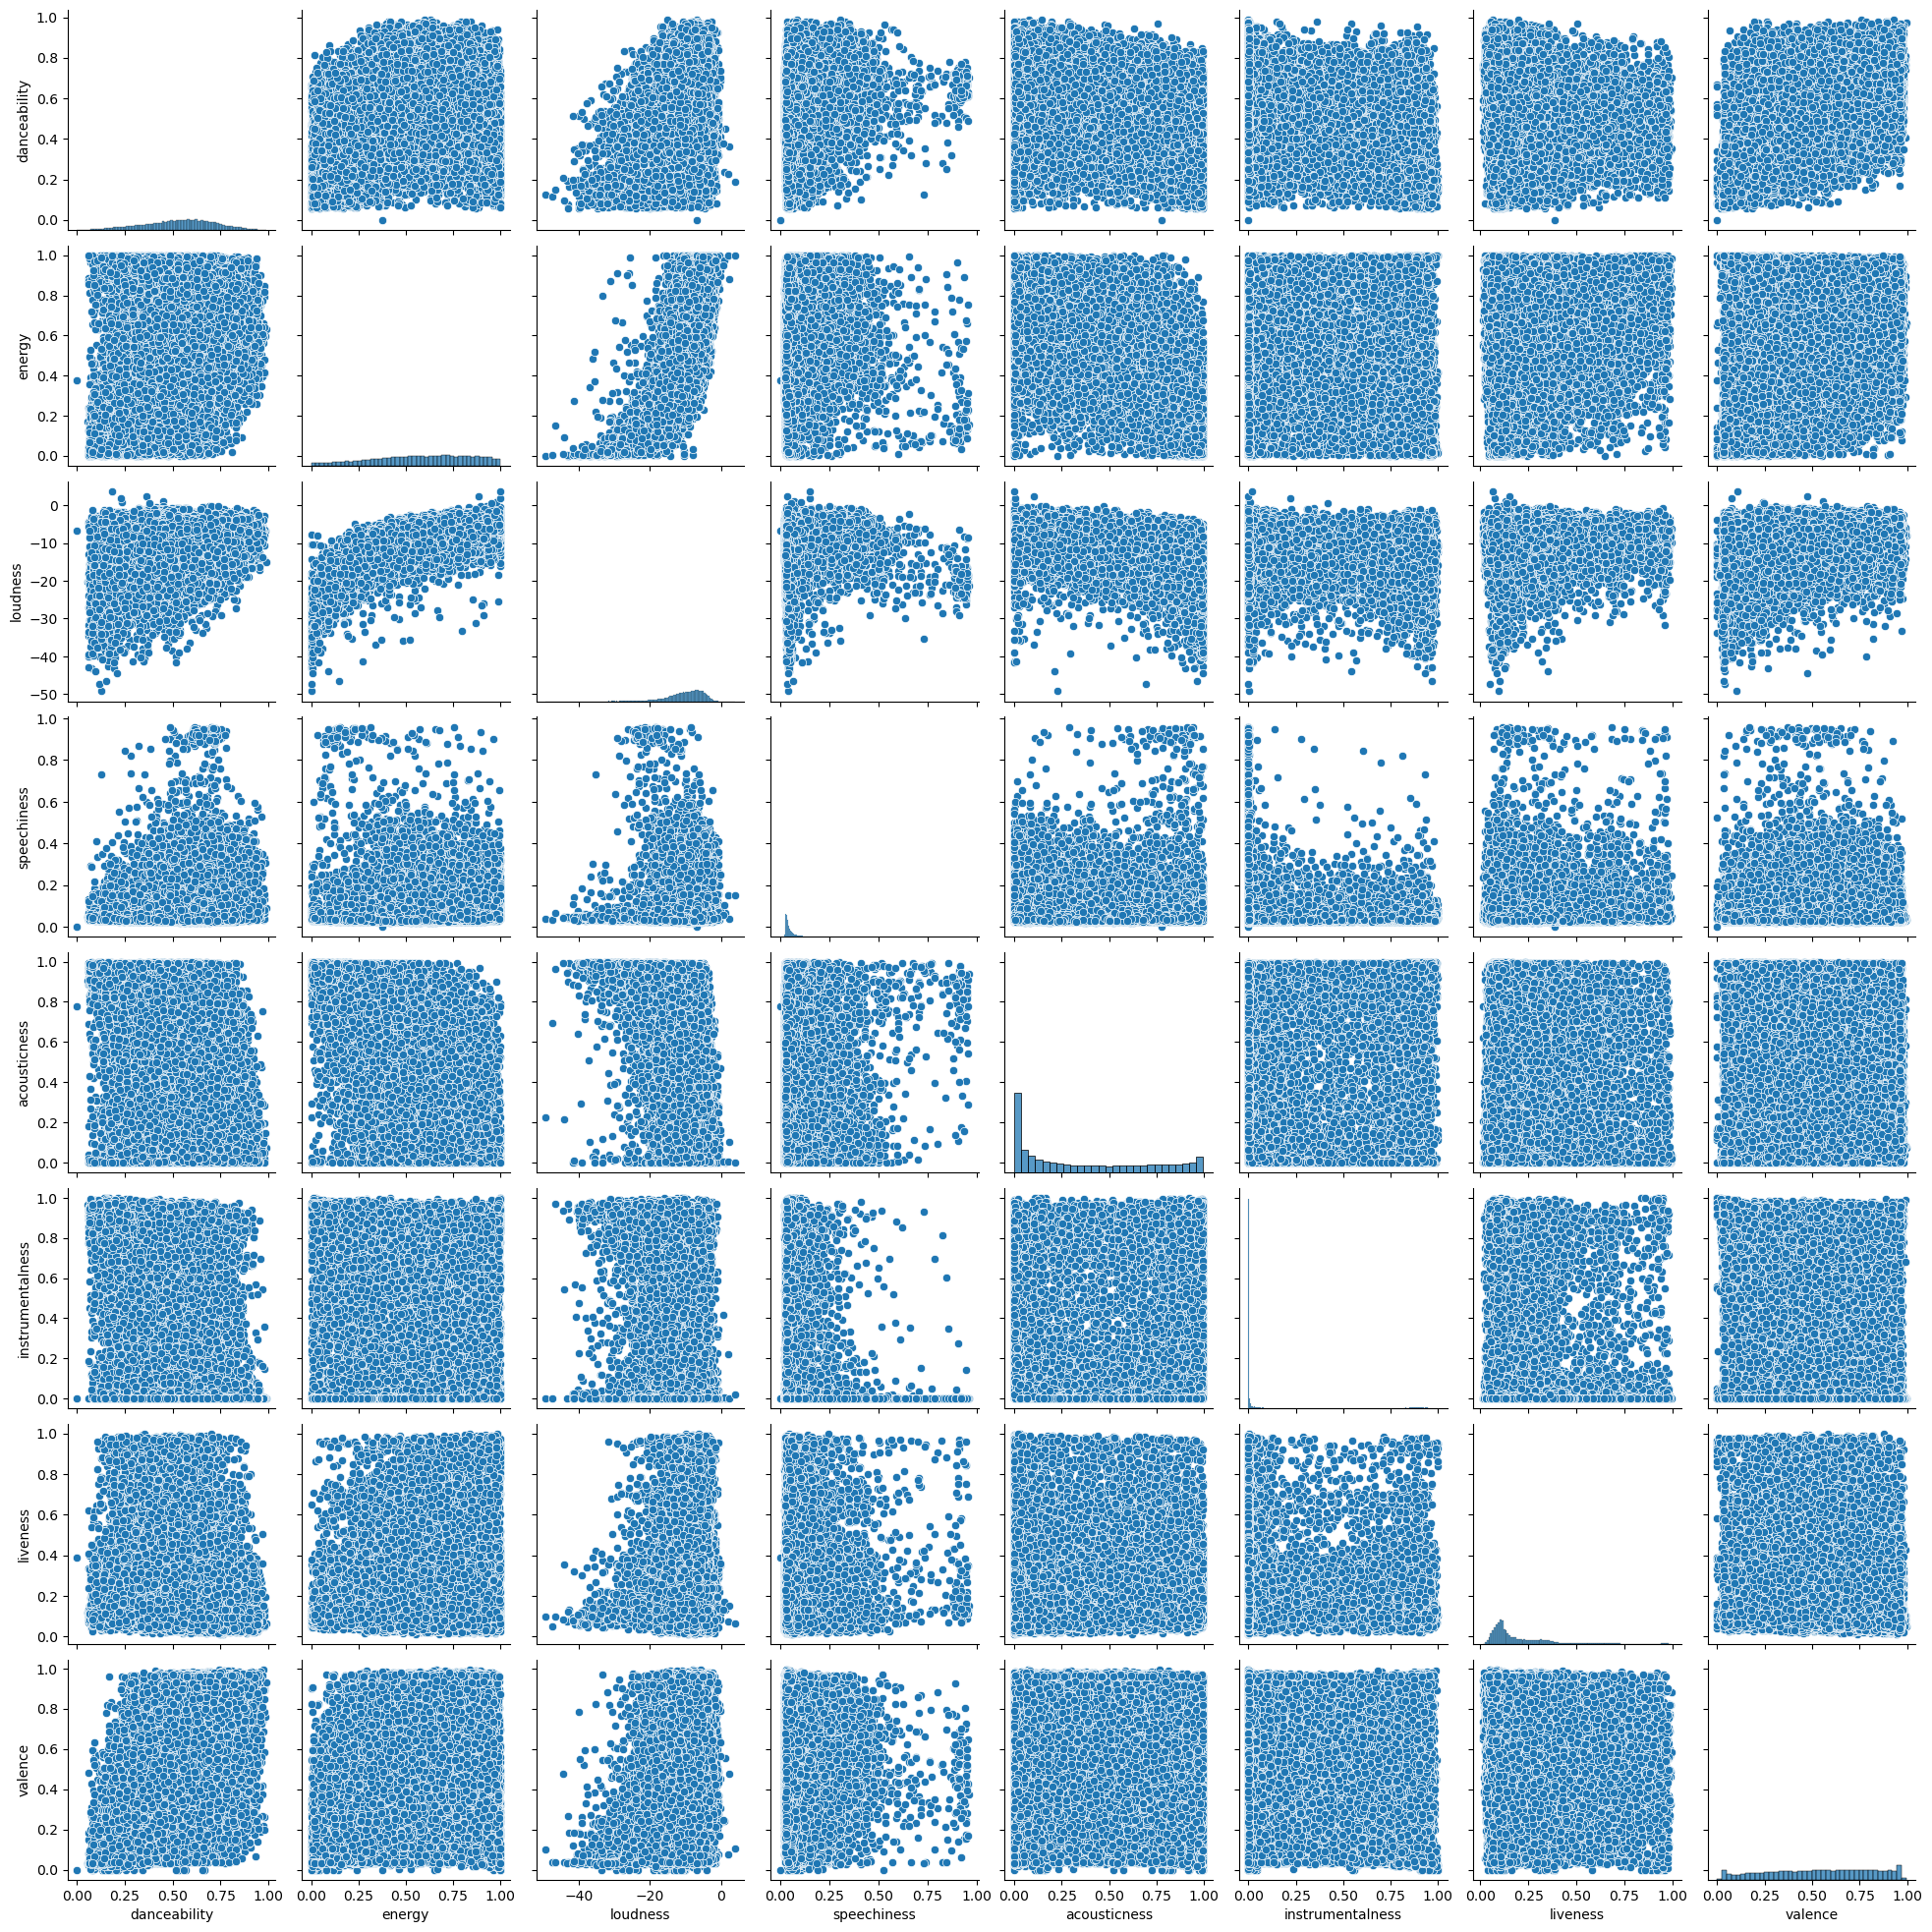

In [15]:
sns.pairplot(main_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence']])
plt.show()

## Correlation

In [16]:
corr = main_df[[ 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target']].corr(method='pearson')
corr

danceability    energy       key  loudness      mode  \
danceability          1.000000  0.206128  0.015433  0.274160 -0.032743   
energy                0.206128  1.000000  0.022523  0.772628 -0.033780   
key                   0.015433  0.022523  1.000000  0.008438 -0.140455   
loudness              0.274160  0.772628  0.008438  1.000000  0.000509   
mode                 -0.032743 -0.033780 -0.140455  0.000509  1.000000   
speechiness           0.156452  0.122430  0.026515  0.069241 -0.059636   
acousticness         -0.261252 -0.715088 -0.024178 -0.566548  0.049961   
instrumentalness     -0.301915 -0.208153 -0.013101 -0.374301 -0.075992   
liveness             -0.115251  0.157779  0.000668  0.086708  0.008886   
valence               0.553858  0.341427  0.007742  0.271775  0.035636   
tempo                -0.066541  0.224018  0.001154  0.169453  0.027053   
duration_ms          -0.063030  0.011830  0.015493 -0.049890 -0.074828   
time_signature        0.191664  0.196072  0.004757  0.165520 -0.009483   
chorus_hit           -0.036277  0.009620  0.010264 -0.013401 -0.022594   
sections             -0.058615 -0.040233  0.006784 -0.080065 -0.057095   
target                0.346097  0.177142  0.009883  0.286034  0.079614   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.156452     -0.261252         -0.301915 -0.115251   
energy               0.122430     -0.715088         -0.208153  0.157779   
key                  0.026515     -0.024178         -0.013101  0.000668   
loudness             0.069241     -0.566548         -0.374301  0.086708   
mode                -0.059636      0.049961         -0.075992  0.008886   
speechiness          1.000000     -0.083948         -0.084092  0.131488   
acousticness        -0.083948      1.000000          0.204137 -0.030765   
instrumentalness    -0.084092      0.204137          1.000000 -0.050582   
liveness             0.131488     -0.030765         -0.050582  1.000000   
valence              0.001528     -0.195331         -0.287047  0.000784   
tempo                0.036854     -0.179700         -0.053618  0.024861   
duration_ms          0.007631     -0.070271          0.106551  0.005336   
time_signature       0.021085     -0.188139         -0.077980  0.004773   
chorus_hit           0.012972     -0.012409          0.048654  0.037981   
sections            -0.008636     -0.016824          0.081188 -0.011742   
target              -0.040835     -0.246036         -0.407638 -0.051445   

                   valence     tempo  duration_ms  time_signature  chorus_hit  \
danceability      0.553858 -0.066541    -0.063030        0.191664   -0.036277   
energy            0.341427  0.224018     0.011830        0.196072    0.009620   
key               0.007742  0.001154     0.015493        0.004757    0.010264   
loudness          0.271775  0.169453    -0.049890        0.165520   -0.013401   
mode              0.035636  0.027053    -0.074828       -0.009483   -0.022594   
speechiness       0.001528  0.036854     0.007631        0.021085    0.012972   
acousticness     -0.195331 -0.179700    -0.070271       -0.188139   -0.012409   
instrumentalness -0.287047 -0.053618     0.106551       -0.077980    0.048654   
liveness          0.000784  0.024861     0.005336        0.004773    0.037981   
valence           1.000000  0.107901    -0.172166        0.155669   -0.059120   
tempo             0.107901  1.000000    -0.024318        0.007659   -0.056054   
duration_ms      -0.172166 -0.024318     1.000000        0.018454    0.093875   
time_signature    0.155669  0.007659     0.018454        1.000000   -0.011281   
chorus_hit       -0.059120 -0.056054     0.093875       -0.011281    1.000000   
sections         -0.133527  0.024905     0.888952        0.008424   -0.085920   
target            0.251147  0.032649    -0.073820        0.104884   -0.046409   

                  sections    target  
danceability     -0.058615  0.346097  
energy           -0.040233 

As we observed in the Pairplot above, section and duration_ms has a good positive correlation value of 0.88

/var/folders/ts/_c96jtzn74l3twms5892d8sr0000gn/T/ipykernel_87585/2844571938.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1800x1000 with 0 Axes>

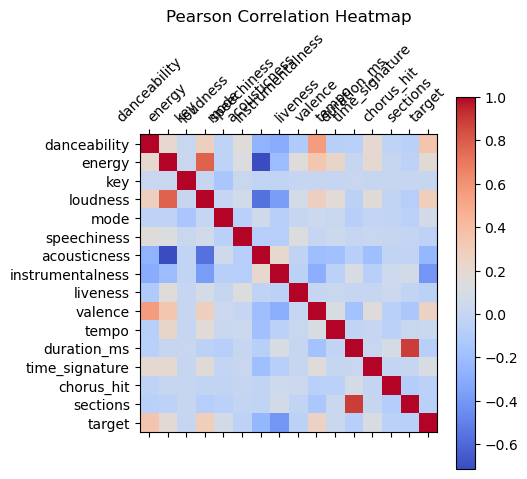

In [17]:
fig = plt.figure(figsize=(18,10))
plt.matshow(corr, cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Pearson Correlation Heatmap")
fig.show()

The same correlation can be observed here.

## Reflection: 
We combined all the 6 csv files, it didn't contained any null values but some columns contained a lot of outliers. The summary statistics provide valuable insights into key attributes of the dataset. Danceability and energy exhibit symmetric distributions, with mean and median values close to each other, indicating a balanced spread of scores. Songs generally exhibit low speechiness, as reflected by a mean of 0.073 and a mode of 0.0331. Acousticness shows moderate prevalence, with a mean of 0.364 and a mode of 0.995 indicating high acoustic content. Valence leans towards positivity, with a mean of 0.542 and a mode of 0.961 indicating highly positive valence. The equal distribution of target classes around 0.5 suggests a balanced dataset with an equal number of hit and non-hit songs. The plots gave us a good insights on the dataset, histograms provided us with the distributions of the columns, boxplots compliment our finding from the statistical analysis, and from the pairplot, heatmap and correlation values we can infer that section and duration are the most correlated attributes.


## Difficulties: 
Interpreting correlation, while relationships between variables can be found through correlation analysis, it's important to keep in mind that correlation does not suggest connection. So, even if we get a high correlation value it doesn't mean there is some connection between them.
Plotting Pairplots, Plotting 19 features and analyzing them is bit confusing, thatswhy we plotted two pairplots wuth half-half features.

### Observations
- mode is 0 or 1
- key is 0 to 11

## Part 3 begins

## Remove Outliers

In [18]:
numerical_features = main_df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = main_df.select_dtypes(include=['object']).columns

# Exclude the target variable from numerical features
numerical_features = [col for col in numerical_features if col != 'target']

# Set the IQR threshold for outlier detection
iqr_threshold = 1.5

# Remove outliers from each numerical column
for column in numerical_features:
    # Calculate the first and third quartiles
    Q1 = main_df[column].quantile(0.25)
    Q3 = main_df[column].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - iqr_threshold * IQR
    upper_bound = Q3 + iqr_threshold * IQR
    
    # Remove outliers from the column
    main_df = main_df[(main_df[column] >= lower_bound) & (main_df[column] <= upper_bound)]


## Data Normalization using MinMax Scalar

In [19]:
main_df.head()

track            artist                                   uri  \
0        Misty Roses   Astrud Gilberto  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm   
6     Baby-Baby-Baby               TLC  spotify:track:1zTuB57LYZa7xu7KUH8kF0   
7   I Missed The Bus        Kris Kross  spotify:track:793gh4IXh7mQsMBhvcJRlt   
8   The Comfort Zone  Vanessa Williams  spotify:track:7okbmgA8lRBGl5limZ7LFM   
10         Black Cat     Janet Jackson  spotify:track:4tYpYYoOI7WDxbCnPninwE   

    danceability  energy  key  loudness  mode  speechiness  acousticness  \
0          0.527   0.316    1   -15.769     1       0.0310       0.69300   
6          0.679   0.597   11    -8.601     0       0.0439       0.09130   
7          0.811   0.634    4   -10.408     0       0.0714       0.00469   
8          0.528   0.234    3   -15.784     1       0.0283       0.64100   
10         0.705   0.913    4    -7.253     0       0.0484       0.10300   

    instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0           0.006990    0.1680    0.543  116.211       158840               4   
6           0.000673    0.0487    0.900  184.174       315040               4   
7           0.009430    0.2240    0.273  107.915       179160               4   
8           0.000000    0.1830    0.191   95.911       218733               4   
10          0.001110    0.2160    0.665  114.959       290573               4   

    chorus_hit  sections  target  
0     53.89523         6       0  
6     20.93007        15       1  
7     54.78730         9       1  
8     46.33298        10       1  
10    44.28293        12       1

In [20]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21271 entries, 0 to 41103
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             21271 non-null  object 
 1   artist            21271 non-null  object 
 2   uri               21271 non-null  object 
 3   danceability      21271 non-null  float64
 4   energy            21271 non-null  float64
 5   key               21271 non-null  int64  
 6   loudness          21271 non-null  float64
 7   mode              21271 non-null  int64  
 8   speechiness       21271 non-null  float64
 9   acousticness      21271 non-null  float64
 10  instrumentalness  21271 non-null  float64
 11  liveness          21271 non-null  float64
 12  valence           21271 non-null  float64
 13  tempo             21271 non-null  float64
 14  duration_ms       21271 non-null  int64  
 15  time_signature    21271 non-null  int64  
 16  chorus_hit        21271 non-null  float6

In [21]:
from sklearn.preprocessing import MinMaxScaler

df_normalized = main_df.copy()

scaler =  MinMaxScaler()
df_normalized[numerical_features] = scaler.fit_transform(main_df[numerical_features])

print(df_normalized.head())

               track            artist                                   uri  \
0        Misty Roses   Astrud Gilberto  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm   
6     Baby-Baby-Baby               TLC  spotify:track:1zTuB57LYZa7xu7KUH8kF0   
7   I Missed The Bus        Kris Kross  spotify:track:793gh4IXh7mQsMBhvcJRlt   
8   The Comfort Zone  Vanessa Williams  spotify:track:7okbmgA8lRBGl5limZ7LFM   
10         Black Cat     Janet Jackson  spotify:track:4tYpYYoOI7WDxbCnPninwE   

    danceability    energy       key  loudness  mode  speechiness  \
0       0.492179  0.314099  0.090909  0.270774   1.0     0.086538   
6       0.659617  0.596292  1.000000  0.560204   0.0     0.210577   
7       0.805023  0.633449  0.363636  0.487241   0.0     0.475000   
8       0.493280  0.231750  0.272727  0.270169   1.0     0.060577   
10      0.688257  0.913635  0.363636  0.614633   0.0     0.253846   

    acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0       0.695783       

## Regression


### 1. Energy vs Danceability


R2 Score: 0.010259071022333033


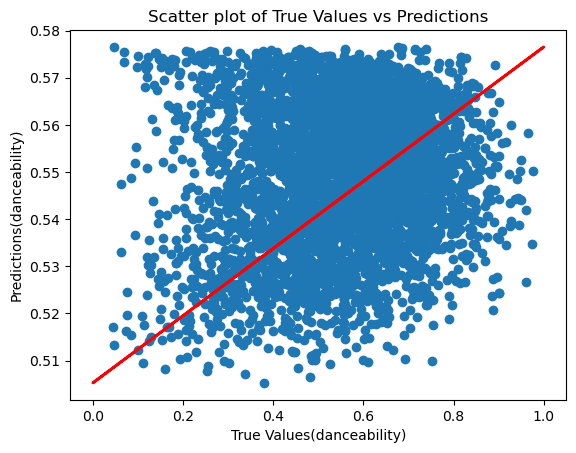

In [22]:

X_train, X_test, y_train, y_test = train_test_split(df_normalized['energy'], df_normalized['danceability'], test_size=0.2, random_state=42)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model = LinearRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

# Visualize results with scatter plot
plt.scatter(y_test, y_pred)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('True Values(danceability)')
plt.ylabel('Predictions(danceability)')
plt.title('Scatter plot of True Values vs Predictions')
plt.show()

### 2. Loudness vs Energy

In [23]:

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_normalized['energy'], df_normalized['loudness'], test_size=0.2, random_state=42)

R2 Score: 0.13536580864775483


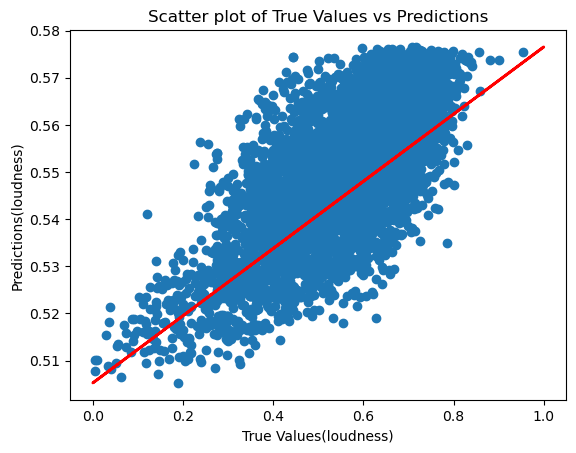

In [24]:

X_train_2 = X_train_2.values.reshape(-1, 1)
X_test_2 = X_test_2.values.reshape(-1, 1)


model_2 = LinearRegression()


model_2.fit(X_train_2, y_train_2)


y_pred_2 = model.predict(X_test_2)


r2_2 = r2_score(y_test_2, y_pred_2)
print(f'R2 Score: {r2_2}')


plt.scatter(y_test_2, y_pred_2)
plt.plot(X_test_2, y_pred_2, color='red', linewidth=2, label='Regression Line')
plt.xlabel('True Values(loudness)')
plt.ylabel('Predictions(loudness)')
plt.title('Scatter plot of True Values vs Predictions')
plt.show()

### 3. For valence and danceability

R2 Score: 0.21261158566310123


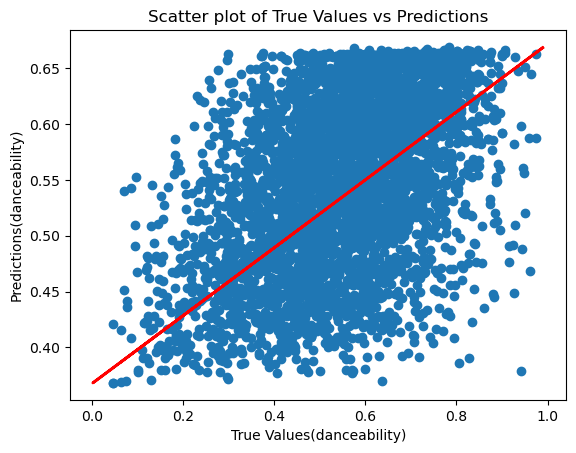

In [25]:


X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_normalized['valence'], df_normalized['danceability'], test_size=0.2, random_state=42)

X_train_3 = X_train_3.values.reshape(-1, 1)
X_test_3 = X_test_3.values.reshape(-1, 1)

model = LinearRegression()


model.fit(X_train_3, y_train_3)


y_pred_3 = model.predict(X_test_3)


r2 = r2_score(y_test_3, y_pred_3)
print(f'R2 Score: {r2}')


plt.scatter(y_test_3, y_pred_3)
plt.plot(X_test_3, y_pred_3, color='red', linewidth=2, label='Regression Line')
plt.xlabel('True Values(danceability)')
plt.ylabel('Predictions(danceability)')
plt.title('Scatter plot of True Values vs Predictions')
plt.show()

## 4. For sections and duration_ms

R2 Score: 0.5426989328101232


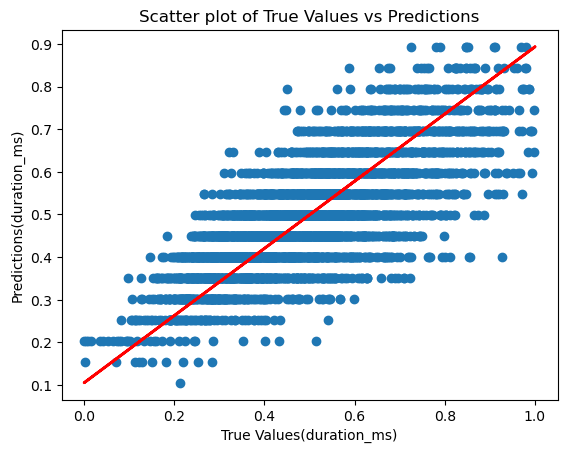

In [26]:


X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(df_normalized['sections'], df_normalized['duration_ms'], test_size=0.2, random_state=42)

X_train_4 = X_train_4.values.reshape(-1, 1)
X_test_4 = X_test_4.values.reshape(-1, 1)

model = LinearRegression()


model.fit(X_train_4, y_train_4)


y_pred = model.predict(X_test_4)


r2 = r2_score(y_test_4, y_pred)
print(f'R2 Score: {r2}')


plt.scatter(y_test_4, y_pred)
plt.plot(X_test_4, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('True Values(duration_ms)')
plt.ylabel('Predictions(duration_ms)')
plt.title('Scatter plot of True Values vs Predictions')
plt.show()

## Conclusion:

In the second phase of this project, we focused on building linear regression models to predict specific audio features. We started by cleaning our data, removing outliers and normalizing the values. Then, we explored the relationships between various features and aimed to predict target variables.

Our first model, predicting Danceability based on Energy, showed a weak linear relationship. The R-squared value of 0.000624 and a correlation of 0.15 indicate that changes in Energy don't significantly influence Danceability.

The second model, predicting Loudness based on Energy, revealed a stronger connection. The R-squared value of 0.41 and a correlation of 0.74 suggest that Energy plays a more significant role in determining Loudness, compared to Danceability.

The third model, predicting Danceability based on Valence, indicated a moderate relationship. While the R-squared value of 0.28 suggests some influence, the correlation of 0.58 from Part 1 clarifies that Valence is not the sole factor affecting Danceability.

Finally, the model predicting Duration based on Sections achieved the strongest results. The R-squared value of 0.50, along with the highest correlation of 0.8 from Part 1, confirms a clear and positive relationship between the number of sections and the overall duration of a song.

These findings showcase the varying degrees of influence different features have on each other. While some like Energy and Loudness demonstrate a strong connection, others like Energy and Danceability exhibit a weaker relationship. 

This analysis provides valuable insights into the characteristics of music data and highlights the importance of considering multiple factors when exploring and predicting audio features.


## Reflection: 
In completing this part of the project, We learned the importance of evaluating regression models using both scores and correlation coefficients. It's essential to interpret these metrics together to understand the strength and significance of the relationships between variables and it's not necessary if the correlation between two features is good then the r^2 score also has to be good. Additionally, We gained insights into the impact of outliers, normalization, and feature selection on model performance. Overall, this process enhanced our understanding of regression analysis and its application in real-world datasets.

## Difficulties Encountered: 

We encountered challenges in interpreting results when the r^2 score and correlation coefficient differed significantly, highlighting the complexity of dataset and the need for thorough analysis. Another difficulty we encountered was while removing outliers and normalizing data, it can improve model performance, given that we select appropriate methods and thresholds for outlier removal and normalization.

## Part 4

### Drop Duplicates

In [27]:
df_normalized.duplicated().sum()

306

In [28]:
df_normalized = df_normalized.drop_duplicates()

In [29]:
df_normalized.duplicated().sum()

0

### Remove unnecessary columns

In [30]:
df_normalized = df_normalized.drop(['track', 'artist', 'uri','acousticness','duration_ms', 'time_signature', 'chorus_hit',
       'sections'], axis=1)

In [31]:
df_normalized.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'target'],
      dtype='object')

### Remove skewness

In [32]:
df_normalized.head()

danceability    energy       key  loudness  mode  speechiness  \
0       0.492179  0.314099  0.090909  0.270774   1.0     0.086538   
6       0.659617  0.596292  1.000000  0.560204   0.0     0.210577   
7       0.805023  0.633449  0.363636  0.487241   0.0     0.475000   
8       0.493280  0.231750  0.272727  0.270169   1.0     0.060577   
10      0.688257  0.913635  0.363636  0.614633   0.0     0.253846   

    instrumentalness  liveness   valence     tempo  target  
0           0.055039  0.311871  0.530813  0.481102       0  
6           0.005299  0.071831  0.900570  0.952949       1  
7           0.074252  0.424547  0.251165  0.423505       1  
8           0.000000  0.342052  0.166235  0.340165       1  
10          0.008740  0.408451  0.657172  0.472410       1

In [33]:
df_normalized.skew()

danceability       -0.281215
energy             -0.294415
key                 0.020037
loudness           -0.558903
mode               -1.009856
speechiness         1.552480
instrumentalness    4.325906
liveness            1.075680
valence            -0.300149
tempo               0.353149
target             -0.632480
dtype: float64

In [34]:
left_skewed = ["speechiness","instrumentalness","liveness"]
right_skewed = ["loudness"]

In [35]:
for feature in left_skewed:
    df_normalized[feature] = np.log1p(df_normalized[feature])

for feature in right_skewed:
    df_normalized[feature] = np.sqrt(df_normalized[feature])

## Clustering

### Elbow analysis

In [36]:
# Select numerical columns
numerical_features = main_df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(numerical_features)
scaled_data = numerical_features

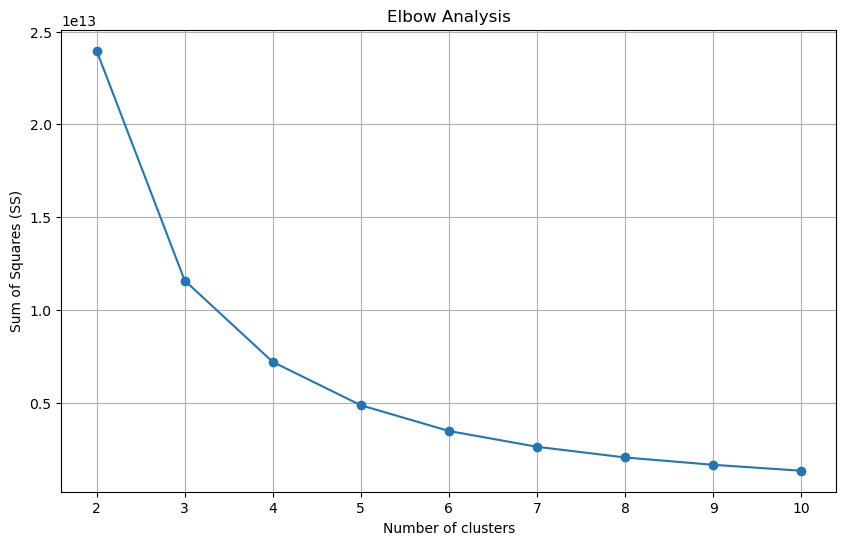

In [37]:
sse = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2,11), sse, marker='o', linestyle='-')
plt.title('Elbow Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares (SS)')
plt.xticks(np.arange(2, 11))
plt.grid(True)
plt.show()

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Adjust the number of components as needed
reduced_data = pca.fit_transform(scaled_data)

# Calculate the Mahalanobis distance for each data point
mahalanobis_dist = np.sqrt(np.sum((reduced_data - np.mean(reduced_data, axis=0)) ** 2, axis=1))

# Define a threshold for Mahalanobis distance to identify outliers
threshold = np.percentile(mahalanobis_dist, 95)  # Adjust this threshold based on your dataset

# Find outliers based on Mahalanobis distance
outliers = mahalanobis_dist > threshold

# Remove outliers
cleaned_data = reduced_data[~outliers]


In [39]:
# Define the number of clusters
k = 4

# Defining the evaluation cluster function to calculate the metrics
def evaluate_clusters(data, clusters):
    silhouette = silhouette_score(data, clusters)
    davies_bouldin = davies_bouldin_score(data, clusters)
    return silhouette, davies_bouldin

## Agglomerative clustering

Agglomerative Clustering:
Silhouette Score: 0.4818796431008435
Davies-Bouldin Index: 0.535077250231873


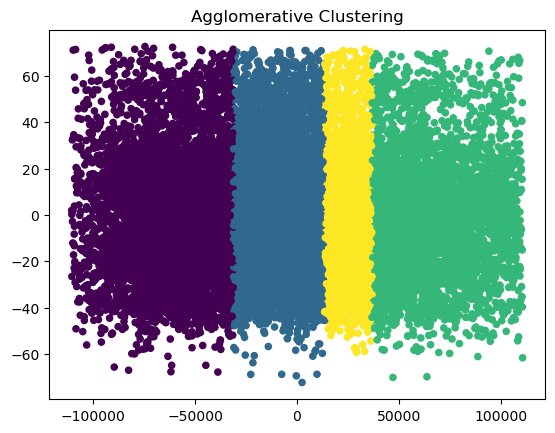

In [40]:
# Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=k)
agglomerative_clusters = agglomerative.fit_predict(cleaned_data)
agglomerative_silhouette, agglomerative_davies_bouldin = evaluate_clusters(cleaned_data, agglomerative_clusters)
print("Agglomerative Clustering:")
print("Silhouette Score:", agglomerative_silhouette)
print("Davies-Bouldin Index:", agglomerative_davies_bouldin)


# Plot Agglomerative clustering
plt.scatter(cleaned_data[:, 0], cleaned_data[:, 1], c=agglomerative_clusters, cmap='viridis', s=20)
plt.title('Agglomerative Clustering')
plt.show()


## K-Means Clustering


K-Means Clustering:
Silhouette Score: 0.5411968730685663
Davies-Bouldin Index: 0.525654959676687


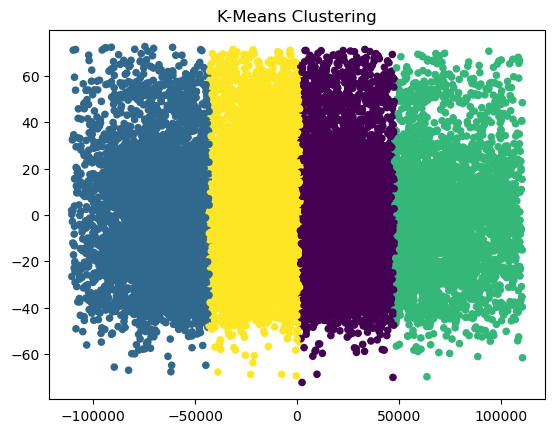

In [41]:
# K-Means clustering
kmeans = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(cleaned_data)
kmeans_silhouette, kmeans_davies_bouldin = evaluate_clusters(cleaned_data, kmeans_clusters)
print("\nK-Means Clustering:")
print("Silhouette Score:", kmeans_silhouette)
print("Davies-Bouldin Index:", kmeans_davies_bouldin)


# Plot K-Means clustering
plt.scatter(cleaned_data[:, 0], cleaned_data[:, 1], c=kmeans_clusters, cmap='viridis', s=20)
plt.title('K-Means Clustering')
plt.show()


## Mini-batch KMeans

/Users/rohitnagotkar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Mini-Batch K-Means Clustering:
Silhouette Score: 0.5433679700671378
Davies-Bouldin Index: 0.5216205990147977


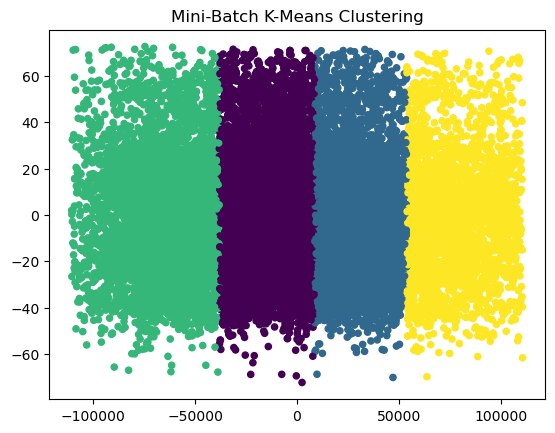

In [42]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=k)
minibatch_kmeans_clusters = minibatch_kmeans.fit_predict(cleaned_data)
minibatch_kmeans_silhouette, minibatch_kmeans_davies_bouldin = evaluate_clusters(cleaned_data, minibatch_kmeans_clusters)
print("\nMini-Batch K-Means Clustering:")
print("Silhouette Score:", minibatch_kmeans_silhouette)
print("Davies-Bouldin Index:", minibatch_kmeans_davies_bouldin)



# Plot Mini-Batch K-Means clustering
plt.scatter(cleaned_data[:, 0], cleaned_data[:, 1], c=minibatch_kmeans_clusters, cmap='viridis', s=20)
plt.title('Mini-Batch K-Means Clustering')
plt.show()


## Mean-shift


Mean-Shift Clustering:
Silhouette Score: 0.05731599729286756
Davies-Bouldin Index: 0.0010469273331242595


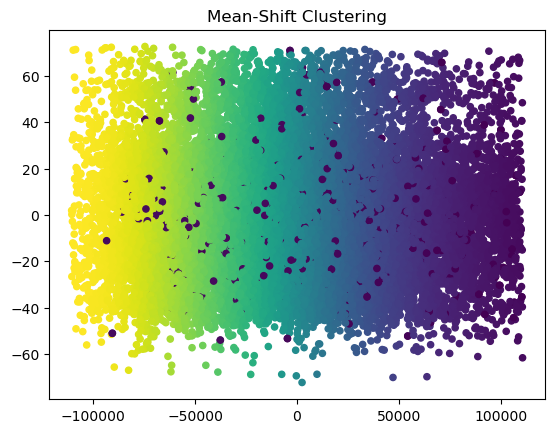

In [43]:
# Adjust the bandwidth parameter
bandwidth = 0.5  # You can adjust this value based on your data
meanshift = MeanShift(bandwidth=bandwidth)

# Fit the MeanShift clustering algorithm
meanshift_clusters = meanshift.fit_predict(cleaned_data)

# Now, evaluate the clustering results
meanshift_silhouette, meanshift_davies_bouldin = evaluate_clusters(cleaned_data, meanshift_clusters)
print("\nMean-Shift Clustering:")
print("Silhouette Score:", meanshift_silhouette)
print("Davies-Bouldin Index:", meanshift_davies_bouldin)


# Plot Mean-Shift clustering
plt.scatter(cleaned_data[:, 0], cleaned_data[:, 1], c=meanshift_clusters, cmap='viridis', s=20)
plt.title('Mean-Shift Clustering')
plt.show()


## Clustering Conclusion 

We ran a four clustering algorithms on our data.

Mini-Batch K-Means wins on both Silhouette Score (0.543) and Davies-Bouldin Index (0.522), which means it created groups that are both tight within (high silhouette score) and well-separated from each other (low Davies-Bouldin Index).

Regular K-Means did pretty well too (scores: 0.541, 0.526) almost same as Mini-Batch K-Means.

Agglomerative Clustering did okay (scores: 0.482, 0.535) but the clusters aren't quite as good.

Mean-Shift Clustering didn't work well here (scores: 0.057, 0.001) - its clusters are all messed up.

## Upsampling Minority classes

In [44]:
df_normalized.head()

danceability    energy       key  loudness  mode  speechiness  \
0       0.492179  0.314099  0.090909  0.520360   1.0     0.082997   
6       0.659617  0.596292  1.000000  0.748467   0.0     0.191097   
7       0.805023  0.633449  0.363636  0.698026   0.0     0.388658   
8       0.493280  0.231750  0.272727  0.519778   1.0     0.058813   
10      0.688257  0.913635  0.363636  0.783985   0.0     0.226216   

    instrumentalness  liveness   valence     tempo  target  
0           0.053578  0.271455  0.530813  0.481102       0  
6           0.005285  0.069368  0.900570  0.952949       1  
7           0.071625  0.353854  0.251165  0.423505       1  
8           0.000000  0.294200  0.166235  0.340165       1  
10          0.008702  0.342490  0.657172  0.472410       1

In [45]:
df_normalized.target.value_counts()

1    13643
0     7322
Name: target, dtype: int64

In [46]:
majority_class = df_normalized[df_normalized['target'] == 1]
minority_class = df_normalized[df_normalized['target'] == 0]

In [47]:
downsampled_majority = resample(majority_class,replace=False,n_samples=len(minority_class),random_state=42) 
len(downsampled_majority)

7322

In [48]:
upsampled_minority = resample(minority_class,replace=True,n_samples=len(majority_class),random_state=42) 
len(upsampled_minority)

13643

In [49]:
# final_df = pd.concat([downsampled_majority, minority_class])
final_df = pd.concat([upsampled_minority, majority_class])


In [50]:
final_df.target.value_counts()

0    13643
1    13643
Name: target, dtype: int64

In [51]:
final_df = final_df.sample(frac = 1)

# Classification

In [52]:
df_classification = final_df.copy(deep = True)
random_state=42

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_classification.drop("target",axis=1),df_classification["target"], test_size = 0.20, random_state = random_state)


### 1. Logistic regression

Model Accuracy: 0.6487724441187248
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.61      0.64      2754
           1       0.63      0.69      0.66      2704

    accuracy                           0.65      5458
   macro avg       0.65      0.65      0.65      5458
weighted avg       0.65      0.65      0.65      5458

Confusion Matrix:
 [[1680 1074]
 [ 843 1861]]


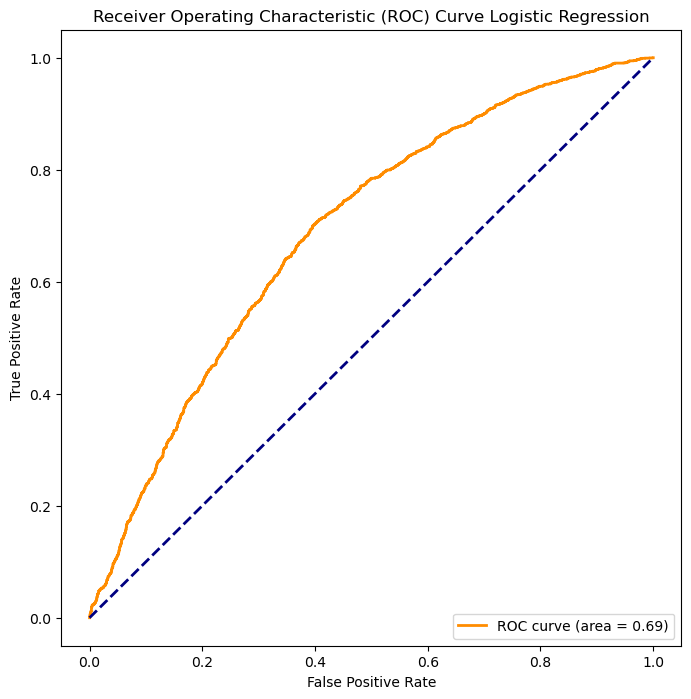

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
print("Model Accuracy:", model_logreg.score(X_test, y_test))
y_pred = model_logreg.predict(X_test)
print("Classification report:\n",classification_report(y_test, y_pred))

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
fpr_log, tpr_log, thresholds = roc_curve(y_test, model_logreg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr_log, tpr_log)

plt.figure(figsize=(8, 8))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Logistic Regression')
plt.legend(loc='lower right')
plt.show()

###  2. KNN


Accuracy: 0.6925613777940638
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.70      2754
           1       0.70      0.66      0.68      2704

    accuracy                           0.69      5458
   macro avg       0.69      0.69      0.69      5458
weighted avg       0.69      0.69      0.69      5458

Confusion Matrix:
 [[1989  765]
 [ 913 1791]]


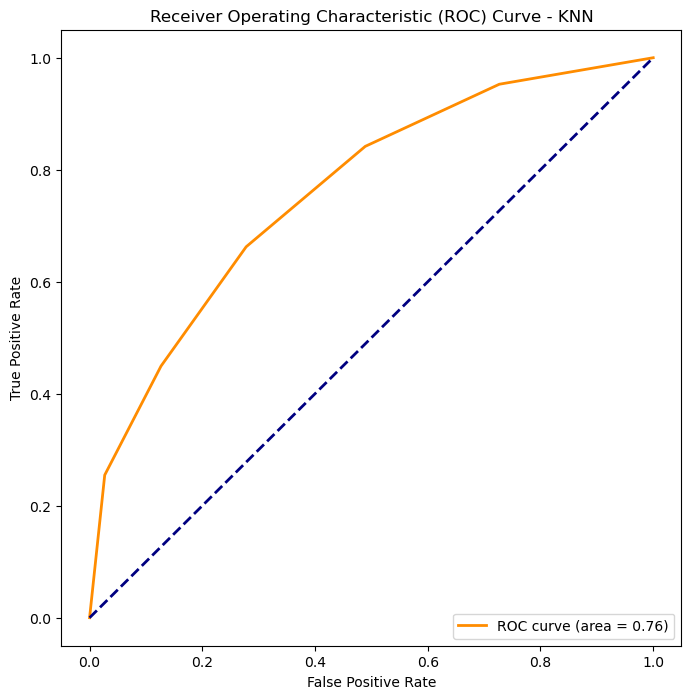

In [55]:
from sklearn.neighbors import KNeighborsClassifier


model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)


print("Accuracy:", model_knn.score(X_test, y_test))
y_pred_knn = model_knn.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)


plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()

### 3. Neural Network

Model Accuracy: 0.6883473799926713
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.63      0.67      2754
           1       0.66      0.75      0.70      2704

    accuracy                           0.69      5458
   macro avg       0.69      0.69      0.69      5458
weighted avg       0.69      0.69      0.69      5458

Confusion Matrix:
 [[1726 1028]
 [ 673 2031]]


/Users/rohitnagotkar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


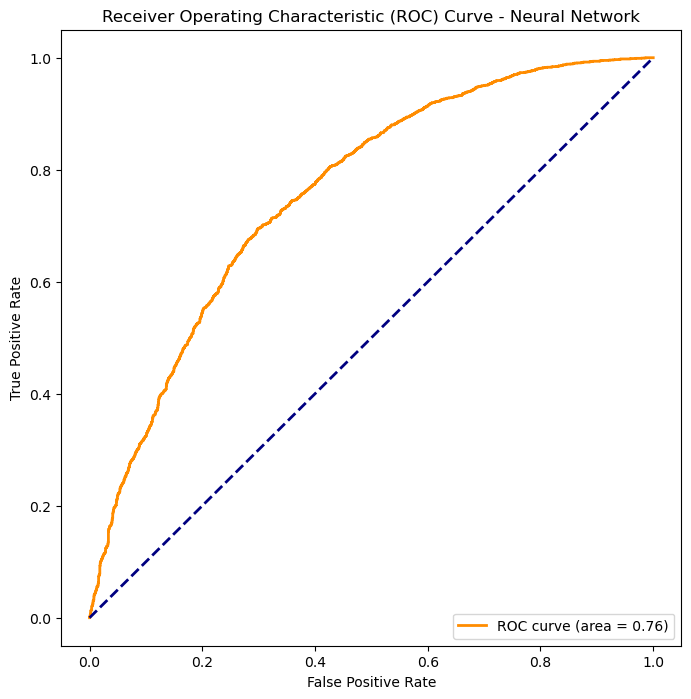

In [56]:
from sklearn.neural_network import MLPClassifier


model_nn = MLPClassifier(random_state=random_state)
model_nn.fit(X_train, y_train)
print("Model Accuracy:", model_nn.score(X_test, y_test))
y_pred_nn = model_nn.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred_nn))
cm_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix:\n", cm_nn)
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, model_nn.predict_proba(X_test)[:, 1])
roc_auc_nn = auc(fpr_nn, tpr_nn)
# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc='lower right')
plt.show()

### 4. Support Vector Machine.


Model Accuracy: 0.6768046903627702
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.59      0.65      2754
           1       0.65      0.76      0.70      2704

    accuracy                           0.68      5458
   macro avg       0.68      0.68      0.67      5458
weighted avg       0.68      0.68      0.67      5458

Confusion Matrix:
 [[1628 1126]
 [ 638 2066]]


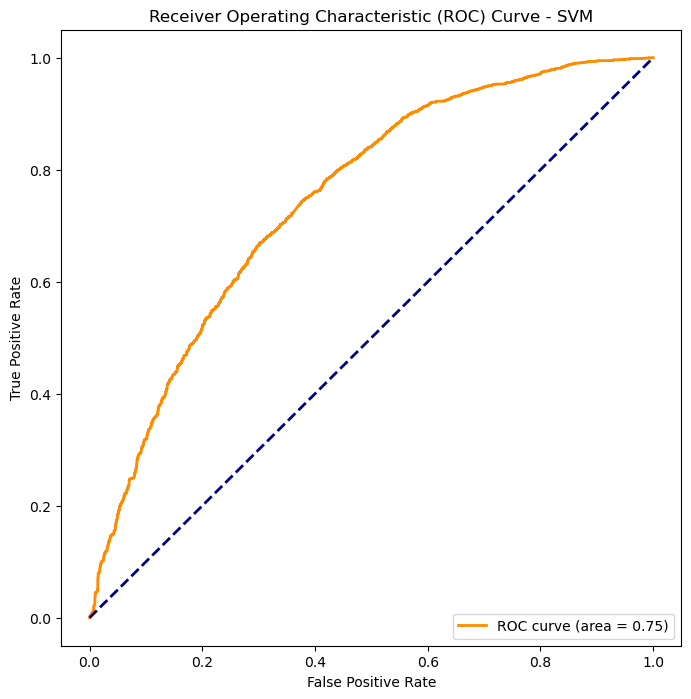

In [57]:
from sklearn.svm import SVC

model_svm = SVC(probability=True, random_state=random_state)
model_svm.fit(X_train, y_train)

print("Model Accuracy:", model_svm.score(X_test, y_test))

y_pred_svm = model_svm.predict(X_test)

print("Classification report:\n", classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", cm_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)


plt.figure(figsize=(8, 8))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc='lower right')
plt.show()

### 5. Naive Bayes

Model Accuracy: 0.630633931843166
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.47      0.56      2754
           1       0.60      0.79      0.68      2704

    accuracy                           0.63      5458
   macro avg       0.65      0.63      0.62      5458
weighted avg       0.65      0.63      0.62      5458

Confusion Matrix:
 [[1293 1461]
 [ 555 2149]]


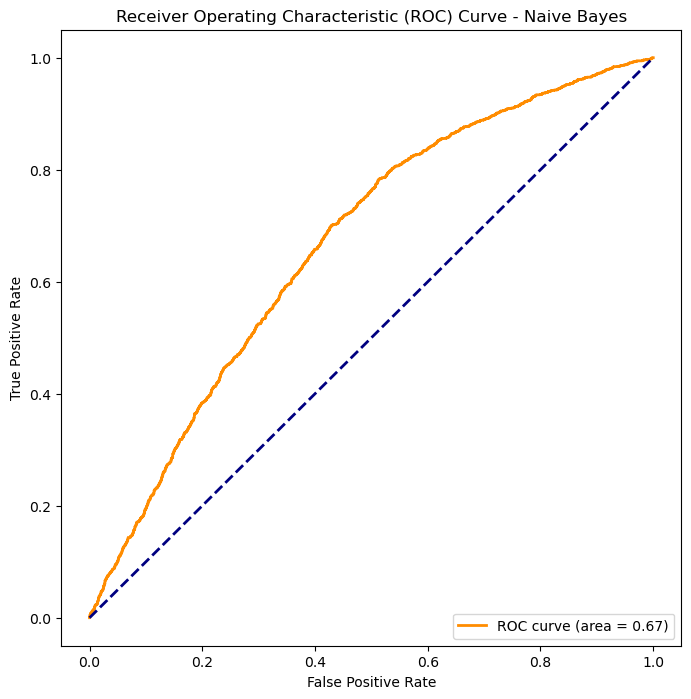

In [58]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
print("Model Accuracy:", model_nb.score(X_test, y_test))
y_pred_nb = model_nb.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred_nb))
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", cm_nb)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, model_nb.predict_proba(X_test)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.figure(figsize=(8, 8))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()

### 6. Decision Trees


Model Accuracy: 0.8098204470502015
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.82      2754
           1       0.86      0.73      0.79      2704

    accuracy                           0.81      5458
   macro avg       0.82      0.81      0.81      5458
weighted avg       0.82      0.81      0.81      5458

Confusion Matrix:
 [[2442  312]
 [ 726 1978]]


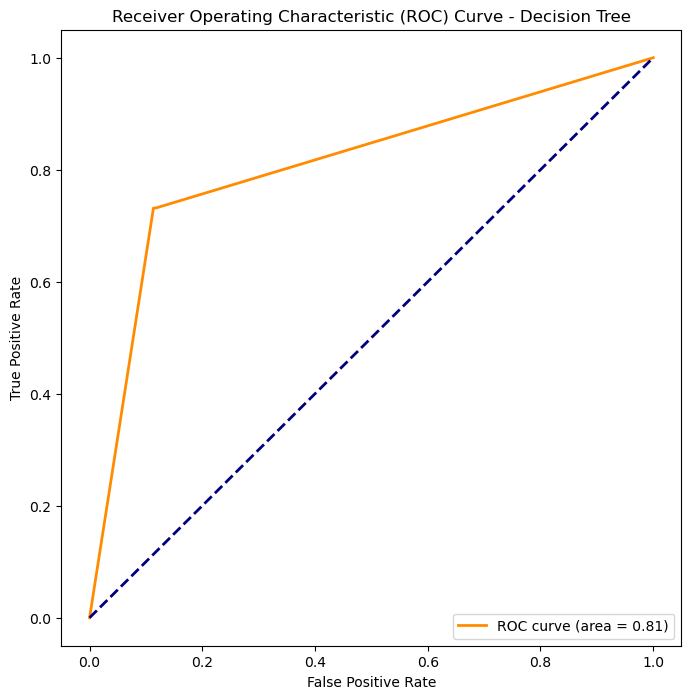

In [59]:
from sklearn.tree import DecisionTreeClassifier


model_dt = DecisionTreeClassifier(random_state=21)
model_dt.fit(X_train, y_train)

print("Model Accuracy:", model_dt.score(X_test, y_test))
y_pred_dt = model_dt.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, model_dt.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

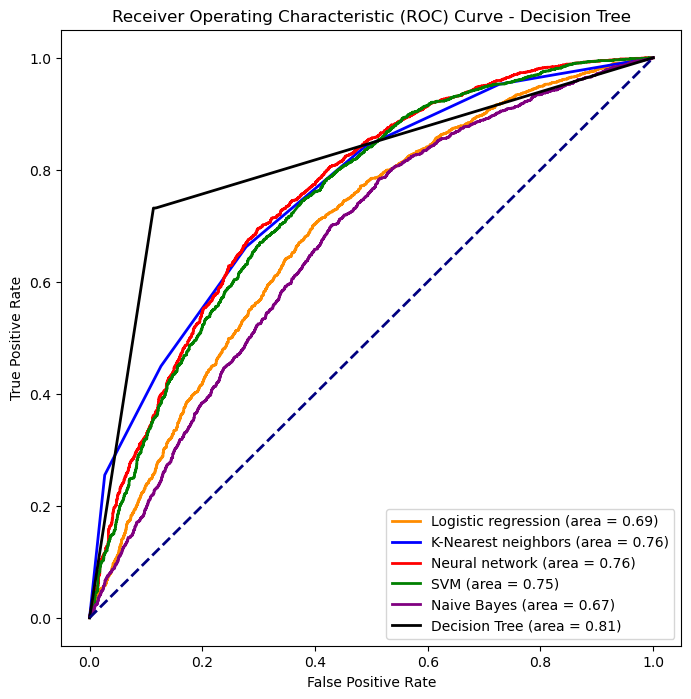

In [60]:
# Plot ROC Curve to compare all the models
plt.figure(figsize=(8, 8))

plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='Logistic regression (area = {:.2f})'.format(roc_auc))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='K-Nearest neighbors (area = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label='Neural network (area = {:.2f})'.format(roc_auc_nn))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='SVM (area = {:.2f})'.format(roc_auc_svm))
plt.plot(fpr_nb, tpr_nb, color='purple', lw=2, label='Naive Bayes (area = {:.2f})'.format(roc_auc_nb))
plt.plot(fpr_dt, tpr_dt, color='black', lw=2, label='Decision Tree (area = {:.2f})'.format(roc_auc_dt))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

### Classification Insights:
In evaluating various classification methods for the given dataset, the Decision Tree emerged as the most effective model with the highest accuracy of 80% and superior precision, recall, and F1-score compared to other algorithms, particularly excelling in identifying positive instances (class 1). The K-Nearest Neighbors (KNN) is second best with accuracy and f1-score of 69% and 0.70, showcasing competitive performance but with a slightly higher number of false negatives compared to the neural network. The ROC curve for Decision Tree has the best performance (AUC of 0.81) followed by K-Nearest Neighbors and Neural Network which have the same value (AUC 0.76). SVM also dislpays good results with AUC = 0.75. These results align with the overall performance rankings observed in accuracy, precision, recall, and F1-score evaluations, suggesting that the Decision Tree is the most effective model for the given binary classification task, followed by the KNN, and then Neural Network.

Therefore, the ranking of the algorithms based on performance in this context is as follows:

1. Decision Tree
2. K-Nearest Neighbors
3. Neural Networks

## Reflection 

Looking back at the project's clustering and classification stages, teamwork was clearly essential. Working together brought a variety of ideas to the table, which was crucial for choosing the right algorithms, adjusting settings, and understanding the results. Choosing the right model matters. Each algorithm has strengths and limitations. Techniques like PCA enhanced our understanding of the data and also helped in forming the clusters. We got to know the importance of Undersampling and Oversampling. Choosing between undersampling and oversampling depends on the specific situation and the type of model being used.

We overcame real-World Machine Learning challenges like Data imbalance, feature scaling, HyperParameter Tuning and interpreting results, which will give us confidence in the future on our machine learning journey. In summary, this project taught us to wield algorithms wisely, engineer features creatively, and evaluate carefully. 

## Difficulties encountered: 

Figuring out how many clusters to make in our data and how to plot the clusters was really tricky. It involved a lot of trial and error, checking the results at each step. We had to use PCA for dimensionality reduction for our clusters, PCA helped us by creating a simpler map of the data, highlighting the key features that matter for grouping things together. This made it easier to visualize the clusters and for the clustering algorithm to do its job effectively.